# Atividade 1

Planejamento de Sistemas Elétricos - PPEE

Aluno: Alexandre Soares Altgott

Matrícula: 

## Objetivo

O objetivo é aplicar a Programação Dinâmica Estocástica à um proiblema estabelicido, neste problema será considerado que há duas usinas térmicas e duas hidrelétricas. Sendo que as duas hidrelétricas estão no mesmo rio, ou seja, uma delas recebe os valores de volume turbinado e vertido em seu reservatório.

## Modelo Generalizado para Otimização

Criação de uma Função para o Despacho Hidrotérmico

$Min \hspace{0.5cm} \sum_{n=1}^{N° Term.} (C_n \cdot gt_n) +  CDEF \cdot def + 0.01 \cdot \sum_{n=1}^{N° Hidr.} vvert_n + \alpha$

Sujeito a:

$ \sum_{n=1}^{N° Hidr.} (\rho_n \cdot vtur_n) + \sum_{n=1}^{N° Term.} gt_n + def = CARGA $ - Atendimento à Demanda

$ vf_n = VI_n + AFL_n - vtur_n - vvert_n $ - Balanço Hídrico para Usinas Independentes

$ vf_n = VI_n + AFL_n - vtur_n - vvert_n + vtur_{ass} + vvert_{ass} $ - Balanço Hídrico para Usinas Associadas

$ Vol. Min. \le vf \le Vol. Max. $

$ 0 \le vtur_n \le Engol. $

$ 0 \le vvert_n \le \infty $

$ 0 \le gt_n \le gt_{n} Max.$

$ 0 \le def \le \infty $

Inequações dos Cortes 

$ \alpha \ge \sum_j{a_{ji}} \cdot {v_f}_j + b_i $

In [5]:
l_usinas = []


usina = {
    "Nome": "UHE_1", # Nome da Usina
    "Tipo": "Hidreletrica",   # Tipo de Usina
    "Associada": None,        # Usina anterior a esta
    "Vmax": 100.,             # Volume Máximo em hm^3
    "Vmin": 20.,              # Volume Mínimo em hm^3
    "Prod": 0.95,             # Produtibilidade em MWmed/hm^3
    "Engol": 60.,             # Engolimento Máximo em hm^3
    "Afl": [                  # Cenários de Afluências (linha: Estágio, coluna: cenário)
            [ 23, 16],
            [ 19, 14],
            [ 15, 11]
    ]
}

l_usinas.append(usina)

# usina = {
#     "Nome": "UHE_2", # Nome da Usina
#     "Tipo": "Hidreletrica",   # Tipo de Usina
#     "Associada": "UHE_1",     # Usina anterior a esta     
#     "Vmax": 100.,             # Volume Máximo em hm^3
#     "Vmin": 20.,              # Volume Mínimo em hm^3
#     "Prod": 0.90,             # Produtibilidade em MWmed/hm^3
#     "Engol": 80.,             # Engolimento Máximo em hm^3
#     "Afl": [                  # Cenários de Afluências (linha: Estágio, coluna: cenário)
#             [ 20, 15],
#             [ 17, 15],
#             [ 19, 14]
#     ]
# }

# l_usinas.append(usina)


# usina = {
#    "Nome": "UHE DO VASCAO",
#    "Tipo": "Hidreletrica",  
#    "Associada": None, 
#    "Vmax": 200.,
#    "Vmin": 40.,
#    "Prod": 0.85,
#    "Engol": 100.,
#    "Afl": [
#            [ 46, 32],
#            [ 38, 28],
#            [ 30, 22]
#    ]
# }
# l_usinas.append(usina)

usina = {
    "Nome": "GT_1",     # Nome da Usina Térmica 1
    "Tipo": "Termica",  # Tipo de Usina
    "Capac": 15.,       # Capacidade Máxima de Geração MWMed
    "Custo": 10.        # Custo de Operação $/MWMed
}

l_usinas.append(usina)

usina = {
    "Nome": "GT_2",     # Nome da Usina Térmica 2
    "Tipo": "Termica",  # Tipo de Usina
    "Capac": 10.,       # Capacidade Máxima de Geração MWMed
    "Custo": 25.        # Custo de Operação $/MWMed
}

l_usinas.append(usina)


d_gerais = {
    "CDef": 500.,             # Custo de Déficit $/MWMed
    "Carga": [ 50., 50., 50.],  # Lista com carga a ser atendida por estágio
    # "Carga": [ 100., 100., 100.],  # Lista com carga a ser atendida por estágio
    "Nr_Disc": 15,            # Número de Discretizações
    "Nr_Est": 3,              # Número de Estágios
    "Nr_Cen": 2               # Número de Cenários de Afluências
}

sistema = {
    "DGer": d_gerais,
    "Usinas": l_usinas
}

## Problema Analisado

USINA HIDRELÉTRICA 1:

$\hspace{0.5cm}$ Volume Máximo: 100 $hm^3$

$\hspace{0.5cm}$ Volume Mínimo: 20 $hm^3$

$\hspace{0.5cm}$ Produtividade: 95%

$\hspace{0.5cm}$ Engol.: 60 $hm^3$

$\hspace{0.5cm}$ Afluências.:

$\hspace{1.cm}$ Estágio 1: 23 $hm^3$ - 16 $hm^3$

$\hspace{1.cm}$ Estágio 2: 19 $hm^3$ - 14 $hm^3$

$\hspace{1.cm}$ Estágio 3: 15 $hm^3$ - 11 $hm^3$

USINA HIDRELÉTRICA 2:

$\hspace{0.5cm}$ Volume Máximo: 100 $hm^3$

$\hspace{0.5cm}$ Volume Mínimo: 20 $hm^3$

$\hspace{0.5cm}$ Produtividade: 90%

$\hspace{0.5cm}$ Engol.: 80 $hm^3$

$\hspace{0.5cm}$ Afluências.:

$\hspace{1.cm}$ Estágio 1: 20 $hm^3$ - 15 $hm^3$

$\hspace{1.cm}$ Estágio 2: 17 $hm^3$ - 15 $hm^3$

$\hspace{1.cm}$ Estágio 3: 19 $hm^3$ - 14 $hm^3$

USINA TÉRMICA 1:

$\hspace{0.5cm}$ Custo: 10 R$

$\hspace{0.5cm}$ Capacidade: 15 MW

USINA TÉRMICA 2:

$\hspace{0.5cm}$ Custo: 25 R$

$\hspace{0.5cm}$ Capacidade: 10 MW


CUSTO DE DÉFICIT = 500 R$

NÚMERO DE ESTÁGIOS = 3

NÚMERO DE DISCRETIZAÇÕES = 15

CARGA:

$\hspace{0.5cm}$ Estágio 1: 100 MW

$\hspace{0.5cm}$ Estágio 2: 100 MW

$\hspace{0.5cm}$ Estágio 3: 100 MW

## Modelo de Otimização para o Problema Analisado

Criação de uma Função para o Despacho Hidrotérmico

$Min \hspace{0.5cm} C_1 \cdot gt_1 + C_2 \cdot gt_2 + CDEF \cdot def + 0.01 \cdot vvert_1 + 0.01 \cdot vvert_2 + \alpha$

Sujeito a:

$ vf_1 = VI_1 + AFL_1 - vtur_1 - vvert_1 $

$ vf_2 = VI_2 + AFL_2 - vtur_2 - vvert_2 + vtur_{1} + vvert_{1} $

$ \rho_1 \cdot vtur_1 + \rho_2 \cdot vtur_2 + gt_1 + gt_2 + def = CARGA $ 

$ 20 \le vf_1 \le 100 $

$ 20 \le vf_2 \le 100 $

$ 0 \le vtur_1 \le 60 $

$ 0 \le vtur_2 \le 80 $

$ 0 \le vvert_1 \le \infty $

$ 0 \le vvert_2 \le \infty $

$ 0 \le gt_1 \le 15 $

$ 0 \le gt_2 \le 10 $

$ 0 \le def \le \infty $

Inequações dos Cortes 

$ \alpha \ge \sum_j{a_{ji}} \cdot {v_f}_j + b_i $

In [3]:
import gurobipy as gp

def despacho(sistema, VI, AFL, pote_de_corte, iest, imprime, n_UHE, n_UTE):


    m = gp.Model()
    m.Params.LogToConsole = 0

    # Volume Final
    vf = m.addVars(n_UHE, name="Volume Final na Usina")

    # Volume Turbinado
    vt = m.addVars(n_UHE, name="Volume Turbinado na Usina")

    # Volume Vertido
    vv = m.addVars(n_UHE, name="Volume Vertido na Usina")

    # Geração Térmica
    gt = m.addVars(n_UTE, name="Volume Final na Usina")

    # Volume Final
    defic = m.addVars(1, name="Deficit")

    # Custo Futuro
    alpha = m.addVars(1, name="Custo Futuro")

    m.update()

    # Função Objetivo

    fob = 0

    term = 0
    hidre = 0

    # Adiciona as parcelas da FOB
    for usi in sistema["Usinas"]:

        if usi['Tipo'] == "Hidreletrica":

            fob += 0.01*vv[hidre]
            usi['Numero'] = hidre
            hidre += 1

        # elif usi['Tipo'] == "Hidreletrica" and usi['Associada'] != None:

        #     for  usi2 in sistema["Usinas"]:

        #         if usi['Associada'] == usi2['Nome']:

        #             fob -= 0.01*vv[usi2['Numero']]

        elif usi['Tipo'] == "Termica": 

            fob += usi['Custo']*gt[term]
            term += 1

    fob += sistema["DGer"]["CDef"]*defic[0]

    fob += 1.0*alpha[0]

    m.setObjective(fob, gp.GRB.MINIMIZE)

    # Adiciona as restrições de balanço hídrico e monta a equação de atendimento a demanda
    term = 0
    hidre = 0
    AD = 0

    for usi in sistema["Usinas"]:

        if usi['Tipo'] == "Hidreletrica" and usi['Associada'] == None:
            names = "c" + str(hidre+1)
            m.addConstr(vf[hidre] == float(VI[hidre]) + float(AFL[hidre]) - vt[hidre] - vv[hidre], name=names)
            m.update()
            AD += usi["Prod"]*vt[hidre]
            hidre += 1

        elif usi['Tipo'] == "Hidreletrica" and usi['Associada'] != None:

            for  usi2 in sistema["Usinas"]:

                if usi['Associada'] == usi2['Nome']:
                    names = "c" + str(hidre+1)
                    m.addConstr(vf[hidre] == float(VI[hidre]) + float(AFL[hidre]) - vt[hidre] - vv[hidre] + vt[usi2['Numero']] + vv[usi2['Numero']], name=names)
                    m.update()
                    AD += usi["Prod"]*vt[hidre]

            hidre += 1

        elif usi['Tipo'] == "Termica":

            AD += gt[term]
            term += 1

    AD += defic[0]

    # Restrição de atendimento a demanda
    m.addConstr(AD == sistema["DGer"]["Carga"][iest-1], name="c0")
    m.update()


    # Restrições de canalização
    term = 0
    hidre = 0

    for usi in sistema["Usinas"]:

        if usi['Tipo'] == "Hidreletrica":

            m.addConstr(vf[hidre] >= usi["Vmin"])
            m.addConstr(vf[hidre] <= usi["Vmax"])
            m.addConstr(vt[hidre] >= 0)
            m.addConstr(vt[hidre] <= usi["Engol"])
            m.addConstr(vv[hidre] >= 0)
            hidre += 1
            m.update()

        elif usi['Tipo'] == "Termica":

            m.addConstr(gt[term] <= usi["Capac"])
            m.addConstr(gt[term] >= 0)
            term += 1
            m.update()
    
    m.addConstr(defic[0] >= 0)
    m.addConstr(alpha[0] >= 0)

    m.update()


    # Restrições do corte

    for icorte in pote_de_corte:

        if icorte['Estagio'] == iest+1:
            equacao = 0

            for i in range(n_UHE):

                equacao += float(icorte['Coefs'][i])*vf[i]

            equacao += float(icorte['Termo_Indep'])
            m.addConstr(alpha[0] >= equacao)
            m.update()

    m.update()

    # Otimiza o problema
    m.optimize()

    # Devolve o resultado necessário
    resposta = []
    hidre = 0
    resposta.append(m.objVal)
    for usi in sistema["Usinas"]:

        if usi['Tipo'] == "Hidreletrica":
            names = "c" + str(hidre+1)
            pi = m.getConstrByName(names)
            resposta.append(pi.Pi)
            hidre += 1

    # Impressão dos resultados 
    if imprime:

        print("Custo Total:", m.objVal)
        hidre = 0
        term = 0

        for usi in sistema["Usinas"]:

            if usi['Tipo'] == "Hidreletrica":

                print(vf[hidre].VarName,"é",vf[hidre].x,"hm3")
                print(vt[hidre].VarName,"é",vt[hidre].x,"hm3")
                print(vv[hidre].VarName,"é",vv[hidre].x,"hm3")
                hidre += 1

            elif usi['Tipo'] == "Termica":

        
                print(gt[term].VarName,"é",gt[term].x, "MWmed")
                term += 1

        print(defic[0].VarName,"é",defic[0].x, "MWmed")

        print(alpha[0].VarName,"é",alpha[0].x, "$")

            

    return resposta

## Implementação do PDE

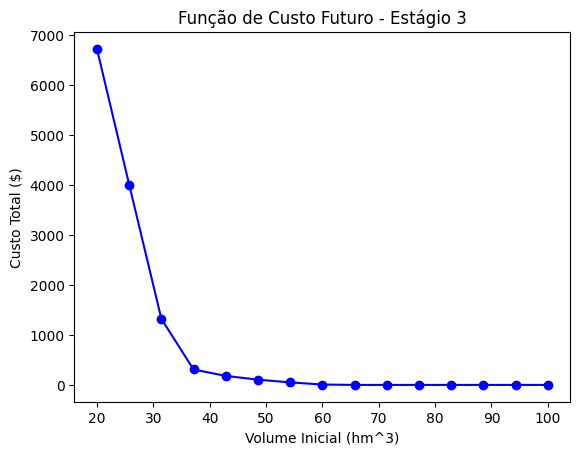

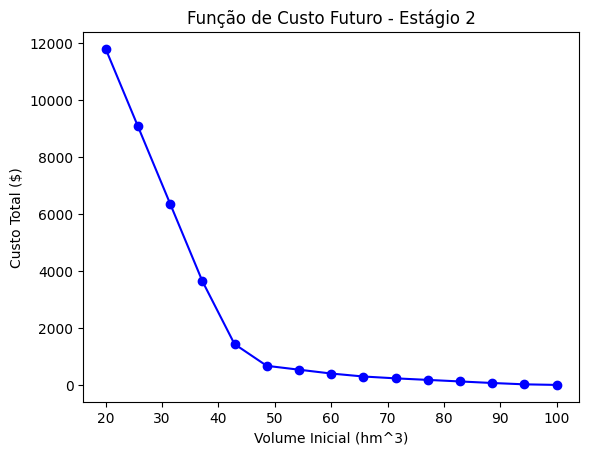

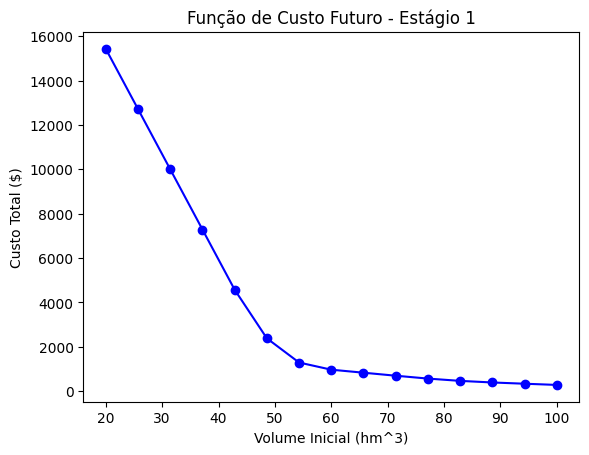

In [6]:
from itertools import product, tee
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib import cm


n_UHE = 0
n_UTE = 0

# Calcula o numero de usinas de cada tipo
for usi in sistema["Usinas"]:

    if usi['Tipo'] == "Hidreletrica":

        n_UHE +=1

    elif usi['Tipo'] == "Termica":

        n_UTE +=1

pote_de_corte = []
imprime = 0


eixoy = []
eixox = []

# Discretiza
passo = 100/(sistema["DGer"]["Nr_Disc"]-1)

discretizacoes = product(np.arange(0,100+passo,passo), repeat = n_UHE)

discretizacoes = list(discretizacoes)

a = np.linspace(0,100,sistema["DGer"]["Nr_Disc"])

b = np.linspace(sistema["DGer"]["Nr_Est"],1,sistema["DGer"]["Nr_Est"])

c = np.linspace(0,sistema["DGer"]["Nr_Cen"]-1,sistema["DGer"]["Nr_Cen"])

# Começa o Loop para cada estágio
for iest in b:
    iest = int(iest)

    eixoy = []
    eixox = []

    # inicia um grafico de superficie caso tenha duas UHE
    if n_UHE == 2:
        
        fig = plt.figure(iest)
        ax = fig.add_subplot(projection='3d')
        ax.set_title('Função de Custo Futuro - Estágio '+str(iest))
        ax.set_xlabel('Vol.In. UHE 1')
        ax.set_ylabel('Vol.In. UHE 2')
        ax.set_zlabel('FCF ($)')
        Usi_1 = np.arange(0,100+passo,passo)
        Usi_2 = np.arange(0,100+passo,passo)
        Usi_1, Usi_2 = np.meshgrid(Usi_1, Usi_2)
        Custos = np.zeros((sistema["DGer"]["Nr_Disc"],sistema["DGer"]["Nr_Disc"]))

    # Começa o loop para cada discretização
    for disc in discretizacoes:

        VI = []

        media_cma = []
        media = 0.
        
        hidre = 0

        # Calcula o valor de VI baseado no atual valor de discretização
        for usi in sistema["Usinas"]:

            if usi['Tipo'] == "Hidreletrica":

                VI.append(usi["Vmin"] + (usi["Vmax"]-usi["Vmin"])*disc[hidre]/100)
                media_cma.append(0)
                hidre += 1

        eixox.append(VI[0])

        # Identifica os cenarios de afluencia e chama a função de despacho para resolver o problema
        for icen in np.linspace(0,sistema["DGer"]["Nr_Cen"]-1,sistema["DGer"]["Nr_Cen"]):

            AFL = []
            
            hidre = 0

            for usi in sistema["Usinas"]:

                if usi['Tipo'] == "Hidreletrica":

                    AFL.append(usi["Afl"][int(iest)-1][int(icen)])

            # Resolve o problema
            resultado = despacho(sistema,VI,AFL, pote_de_corte, int(iest), imprime, n_UHE, n_UTE)

            # Soma o resultado de custo do atual cenario para a media 
            media += resultado[0]

            # Soma o resultado de CMA do atual cenario para a media de CMA 
            for usi in sistema["Usinas"]:
                
                if usi['Tipo'] == "Hidreletrica":

                    media_cma[hidre] += -resultado[hidre+1]

            
                    hidre += 1

        # Faz a media de custo dos cenarios
        media = media/sistema["DGer"]["Nr_Cen"]

        # Organiza os resultados necessários para o grafico em caso de duas UHE
        if n_UHE == 2:

            for linha in range(sistema["DGer"]["Nr_Disc"]):

                for coluna in range(sistema["DGer"]["Nr_Disc"]):

                    if Usi_1[linha][coluna] == disc[0] and Usi_2[linha][coluna] == disc[1]:

                        Custos[linha][coluna] = media

        term_indep = media


        hidre = 0

        # Calcula os elementos para a inequação de corte
        for usi in sistema["Usinas"]:

            if usi['Tipo'] == "Hidreletrica":
        
                media_cma[hidre] = -media_cma[hidre] / sistema["DGer"]["Nr_Cen"]
                term_indep -= VI[hidre]*media_cma[hidre]
                hidre += 1

        corte = {
            "Estagio": iest ,
            "Termo_Indep": term_indep,
            "Coefs": media_cma
        }

        pote_de_corte.append(corte)
        eixoy.append(media)
    
    # Plota o grafico de superficie para o caso de duas UHE
    if n_UHE == 2:    
        surf = ax.plot_surface(Usi_1, Usi_2, Custos, cmap=cm.jet)

    # Plota o grafico para o caso de uma UHE
    if n_UHE == 1:
        plt.figure(iest)
        plt.title("Função de Custo Futuro - Estágio "+str(iest))
        plt.xlabel("Volume Inicial (hm^3)")
        plt.ylabel("Custo Total ($)")
        plt.plot(eixox,eixoy,marker="o",color="blue")
    
    

